[[-60]
 [ 15]
 [ 87]
 [138]
 [178]
 [206]
 [228]
 [246]
 [260]
 [274]
 [283]
 [291]
 [300]
 [307]]
bsdhbfiufbe [[ 30]
 [ 40]
 [ 50]
 [ 60]
 [ 70]
 [ 80]
 [ 90]
 [100]
 [110]
 [120]
 [130]
 [140]
 [150]
 [160]]


Text(0.5, 1.0, 'Exponential Fit')

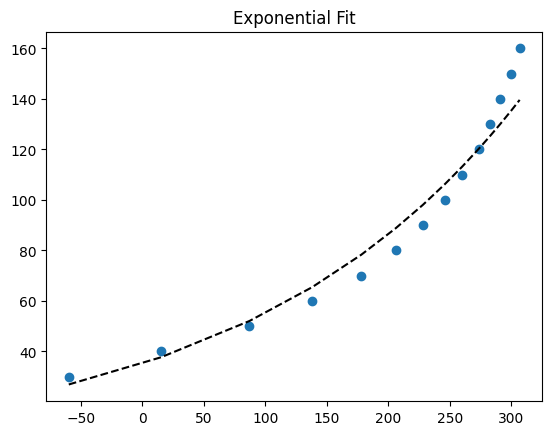

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer


np.random.seed(123)
# General Functions
def func_exp(x, a, b, c):
    """Return values from a general exponential function."""
    return a * np.exp(b * x) + c


def func_log(x, a, b, c):
    """Return values from a general log function."""
    return a * np.log(b * x) + c


# Helper
def generate_data(func, *args, jitter=0):
    """Return a tuple of arrays with random data along a general function."""
    xs = np.linspace(1, 5, 50)
    ys = func(xs, *args)
    noise = jitter * np.random.normal(size=len(xs)) + jitter
    xs = xs.reshape(-1, 1)                                  # xs[:, np.newaxis]
    ys = (ys + noise).reshape(-1, 1)
    return xs, ys
transformer = FunctionTransformer(np.log, validate=True)
# Data
x_samp = np.array([-60,15,87,138,178,206,228,246,260,274,283,291,300,307])
y_samp = np.array([30,40,50,60,70,80,90,100,110,120,130,140,150,160])
x_samp = x_samp.reshape(-1, 1)
y_samp = y_samp.reshape(-1, 1)
y_trans = transformer.fit_transform(y_samp)             # 1
print(x_samp)
print('bsdhbfiufbe',y_samp)
# Regression
regressor = LinearRegression()
results = regressor.fit(x_samp, y_trans)                # 2
model = results.predict
y_fit = model(x_samp)

# Visualization
plt.scatter(x_samp, y_samp)
plt.plot(x_samp, np.exp(y_fit), "k--", label="Fit")     # 3
plt.title("Exponential Fit")